C:\Users\MALIREDDY CHARAN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\MALIREDDY CHARAN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\MALIREDDY CHARAN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\MALIREDDY CHARAN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will chang

C:\Users\MALIREDDY CHARAN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


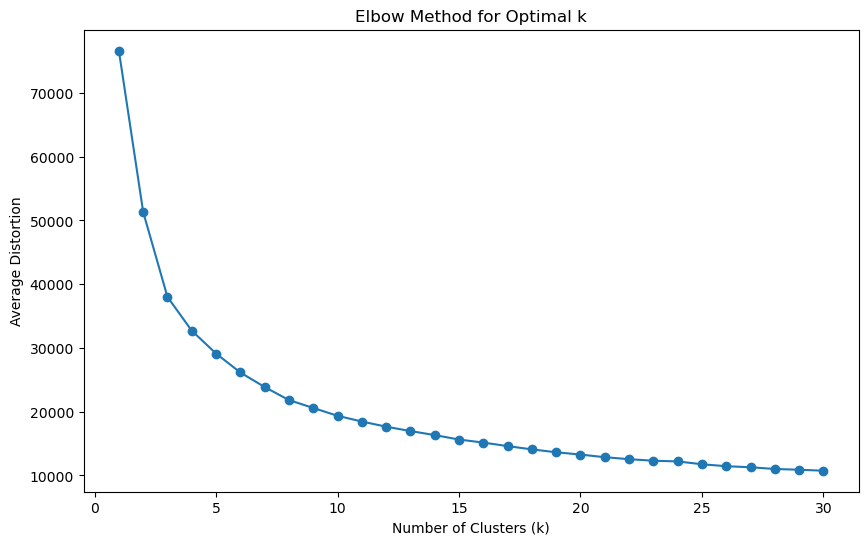

In [35]:
'A2'
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv(r"C:\Users\MALIREDDY CHARAN\Desktop\charan_dataset.csv")

# Remove the "target" column
data = data.drop('target', axis=1)

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Determine the ideal k value using the elbow method
distortions = []
k_range = range(1, 31)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    distortions.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, distortions, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Distortion')
plt.show()

In [25]:
'A1'
import pandas as pd
import numpy as np
from sklearn.cluster import KMeansCluster
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('charan_dataset.csv')

# Merge the train and test sets
data = data.append(data, ignore_index=True)

# Remove the class labels
data.drop(columns=['Class'], inplace=True)

# Apply k-means clustering with k=3 or 5
k = 3
data_scaled = StandardScaler().fit_transform(data)
kmeans = KMeansCluster(n_clusters=k, random_state=0).fit(data_scaled)
labels = kmeans.labels_

# Create a DataFrame with the original features and cluster labels
data['cluster'] = labels

# Save the clustered data
data.to_csv('clustered_data.csv', index=False)

ImportError: cannot import name 'KMeansCluster' from 'sklearn.cluster' (C:\Users\MALIREDDY CHARAN\anaconda3\Lib\site-packages\sklearn\cluster\__init__.py)

C:\Users\MALIREDDY CHARAN\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


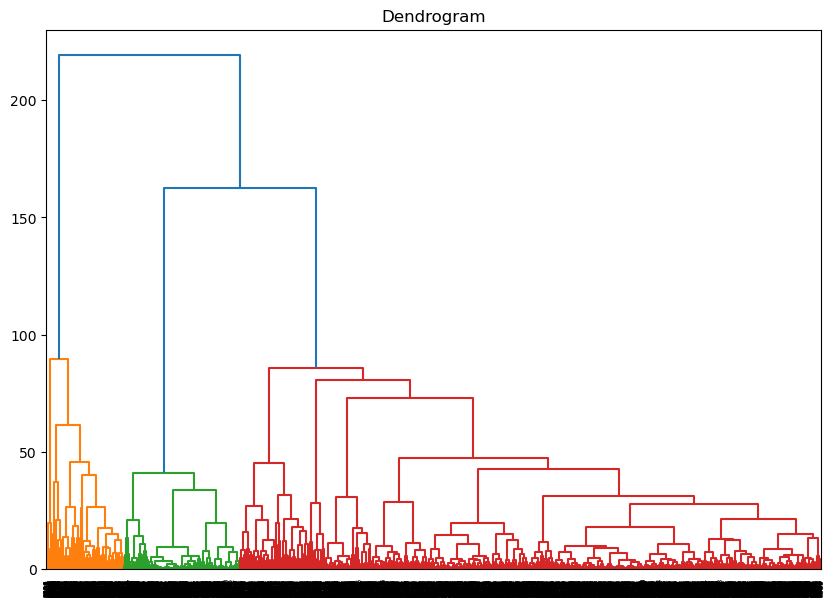

In [26]:
'A3'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

# Load the dataset
data = pd.read_csv(r"C:\Users\MALIREDDY CHARAN\Desktop\charan_dataset.csv")

# Remove the non-numeric column
data = data.drop('target', axis=1)

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Perform hierarchical clustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(scaled_data)

# Plot the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dend = shc.dendrogram(shc.linkage(scaled_data, method='ward'))
plt.show()

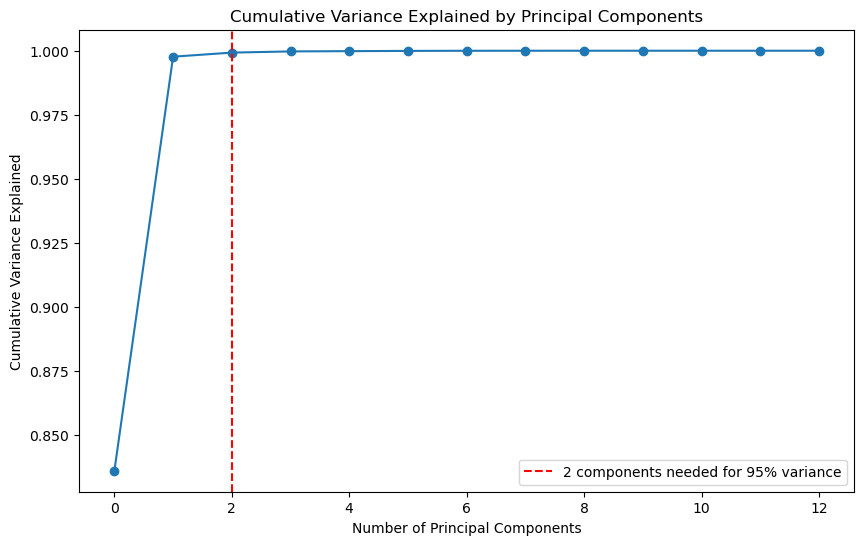

Number of components needed for 95% variance: 2


In [32]:
'A4'
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv(r"C:\Users\MALIREDDY CHARAN\Desktop\charan_dataset.csv")

# Split the dataset into features and target
X = data.drop('target', axis=1)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Observe the variances along the principal components
explained_variances = pca.explained_variance_ratio_
cumulative_variances = np.cumsum(explained_variances)

# Identify the number of features needed to capture 95% of the data variance
n_components = np.argmax(cumulative_variances >= 0.95) + 1

# Plot the variances
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variances, marker='o')
plt.title('Cumulative Variance Explained by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.axvline(x=n_components, color='r', linestyle='--', label=f'{n_components} components needed for 95% variance')
plt.legend()
plt.show()

print(f'Number of components needed for 95% variance: {n_components}')

In [34]:
'A5'
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv(r"C:\Users\MALIREDDY CHARAN\Desktop\charan_dataset.csv")

# Split the dataset into features and target
X = data.drop('target', axis=1)
y = data['target']

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate the variance explained by each principal component
variance_ratio = pca.explained_variance_ratio_

# Identify the number of features needed to capture 95% of data variance
cumulative_variance_ratio = np.cumsum(variance_ratio)
n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1

# Transform the data with the initial KPC's
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train a random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Calculate the accuracy using the transformed dataset
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy using transformed dataset: {accuracy:.2f}')

Accuracy using transformed dataset: 0.85
